In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator, random, math

from scipy import special
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Part 1

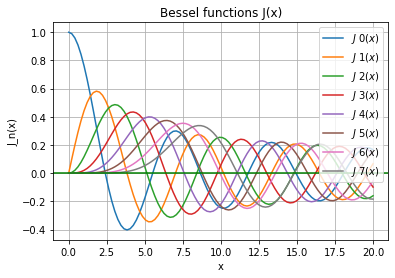

In [2]:
x = np.linspace(0, 20, 100)
for n in range(8):
    y = special.jn(n,x)
    plt.plot(x,y,label=r'$J_ %s (x)$'%n)
plt.axhline(0, color = 'green', label = '_nolegend_')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('J_n(x)')
plt.title('Bessel functions J(x)')
plt.show()

## Part 2

In [3]:
noise = np.random.normal(0,1,100)
noise

array([ 0.01345507, -1.00515591,  0.67218673, -0.31426259,  0.6787205 ,
        0.807601  , -0.26867989,  1.81003706,  0.7683898 ,  0.41081927,
        0.97980065, -0.77878315,  2.97910697, -0.34022928,  0.33682225,
        0.70804774,  0.03552288, -0.09572509,  0.18300923,  1.20740334,
        0.10798952, -0.76348856,  0.21675535,  0.40693176,  0.33361264,
        1.06027636, -1.11963411, -0.65477125, -0.87309368,  0.40673807,
        0.88973495,  0.88003515, -0.51904494, -1.10079001, -0.93142151,
       -0.61499408, -0.10344001, -1.56642801, -0.48640973,  1.09218706,
        1.36170807,  0.02591502,  1.87708683, -0.67073049,  0.85368266,
       -1.51599241, -0.48457232,  0.18069215, -0.2308452 ,  0.71974835,
       -1.1240687 ,  1.22750024, -0.6473221 , -0.29897333,  0.20684091,
        0.68564348, -0.13629931,  1.24673777,  0.98625905, -0.23569569,
       -1.53637729,  0.26874368,  0.76190369,  0.21243094,  1.23868843,
       -1.72169074, -1.89713269,  0.05210029, -1.16401895,  1.82

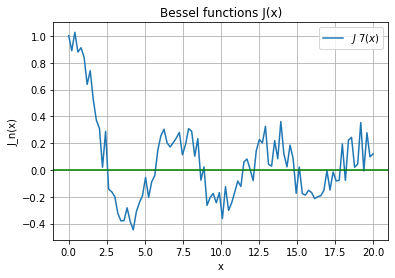

In [4]:
y = special.jn(0,x) + noise * 0.1
plt.plot(x,y,label=r'$J_ %s (x)$'%n)
plt.axhline(0, color = 'green', label = '_nolegend_')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('J_n(x)')
plt.title('Bessel functions J(x)')
plt.show()

## Part 3

In [5]:
def polynomial(x, y, d):
    xx = x[:, np.newaxis]
    yy = y[:, np.newaxis]

    polynomial_features= PolynomialFeatures(degree=d)
    x_poly = polynomial_features.fit_transform(xx)

    model = LinearRegression()
    model.fit(x_poly, yy)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(yy,y_poly_pred))
    r2 = r2_score(yy,y_poly_pred)
    print("RMSE: " + str(rmse))
    print("R-score: " + str(r2))

    plt.scatter(xx, yy, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(xx,y_poly_pred), key=sort_axis)
    xx, y_poly_pred = zip(*sorted_zip)
    plt.plot(xx, y_poly_pred, color='m')
    plt.show()

RMSE: 0.12529439572626228
R-score: 0.8411329489409007


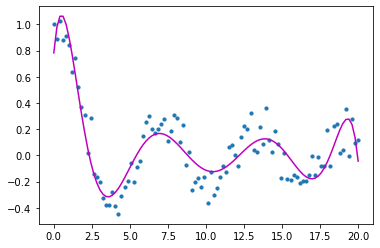

In [6]:
polynomial(x, y, 8)

## Part 4

- n = 10

In [7]:
def plot_poly(d, n, r):
    x = np.linspace(0, 20, n)
    noise = np.random.normal(0,1,n)
    y = special.jn(0,x) + noise * 0.1
    x_train, x_test, y_train, y_test = data_split(n, r, x, y)
    plt.title('Train')
    polynomial(x_train , y_train , d)
    plt.title('Test')
    polynomial(x_test , y_test , d)

In [8]:
def data_split(n, rate, x, y):
    x_rand = list()
    y_rand = list()
    for i in range(n):
        r = random.randint(0,len(x)-1)
        x_rand.append(x[r])
        y_rand.append(y[r])

    n_t = math.floor((1-rate) * n)
    x_train = np.array(x_rand[:n_t])
    x_test = np.array(x_rand[n_t:])
    y_train = np.array(y_rand[:n_t])
    y_test = np.array(y_rand[n_t:])
    
    return x_train, x_test, y_train, y_test

RMSE: 6.6507398159018e-11
R-score: 1.0


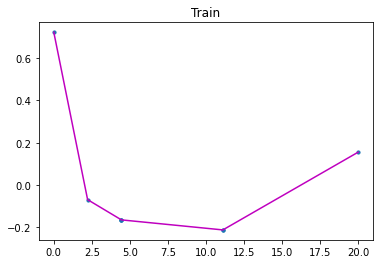

RMSE: 4.3885418357208765e-17
R-score: 1.0


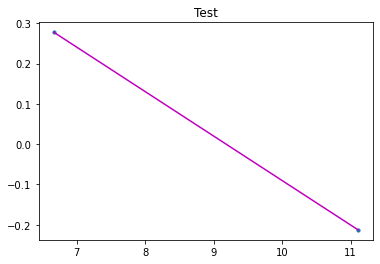

In [9]:
plot_poly(8, 10, 0.2)

## Part 5

- n = 20

RMSE: 5.838266229649992e-07
R-score: 0.9999999999973296


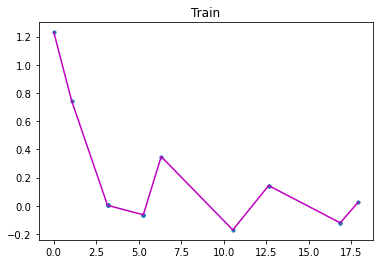

RMSE: 1.9944782024369714e-14
R-score: 1.0


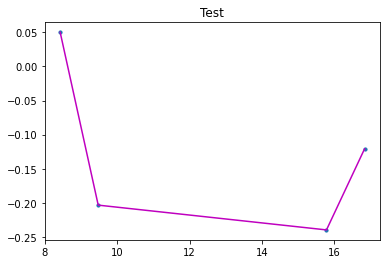

In [10]:
plot_poly(8, 20, 0.2)

- n = 100

RMSE: 0.11596932487596108
R-score: 0.8691907135818395


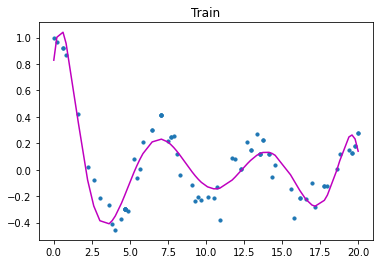

RMSE: 0.07845975422372319
R-score: 0.9484771729944539


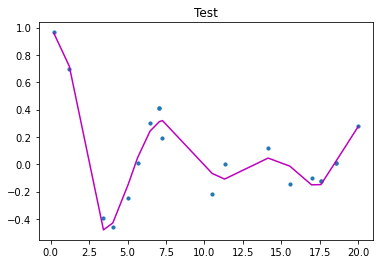

In [11]:
plot_poly(8, 100, 0.2)

- n = 1000

RMSE: 0.1260769053835633
R-score: 0.8570416180852196


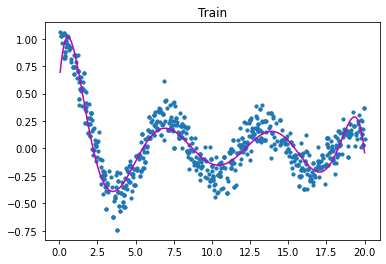

RMSE: 0.11838468054757048
R-score: 0.8229109979749459


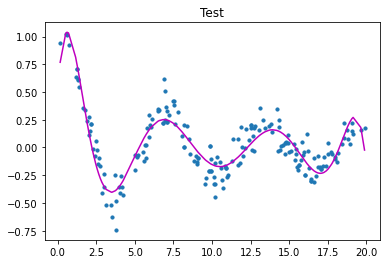

In [12]:
plot_poly(8, 1000, 0.2)

- n = 10000

RMSE: 0.12619086666712026
R-score: 0.8378432548367403


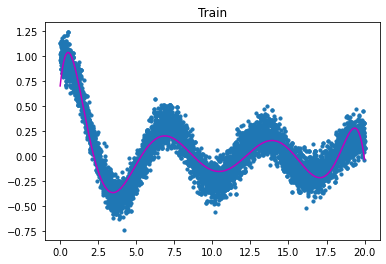

RMSE: 0.1271052987413884
R-score: 0.8327890342317852


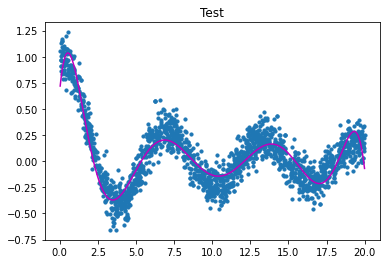

In [13]:
plot_poly(8, 10000, 0.2)